# Implematation of ANN using Keras :

In [1]:
#Importng libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

2023-06-01 20:34:31.421444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 20:34:31.491287: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-01 20:34:31.492925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 20:34:32.623011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.__version__,tf.keras.__version__)

2.12.0 2.12.0


In [3]:
os.getcwd()

'/home/jovyan/work/Deep Learning'

## GPU and CPU check

In [4]:
tf.config.list_logical_devices("GPU")

[]

In [5]:
tf.config.list_logical_devices("CPU")

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

## Creating a simple classifier using Keras on MNIST data

In [6]:
mnist = tf.keras.datasets.mnist ##handwritten digits  images

In [7]:
#train test split
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [8]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
## create a validation dataset from training dataset
X_val,X_train = X_train[:5000]/255 ,X_train[5000:]/255
y_val,y_train = y_train[:5000] ,y_train[5000:]

In [11]:
## Scale X_test also
X_test = X_test/255

In [12]:
print("datapoint of X_train : ",X_train.shape[0])
print("datapoint of X_test : ",X_test.shape[0])
print("datapoint of X_val : ",X_val.shape[0])

datapoint of X_train :  55000
datapoint of X_test :  10000
datapoint of X_val :  5000


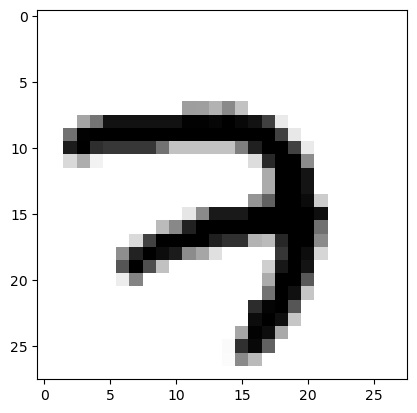

In [13]:
## lets view a data
plt.imshow(X_train[0],cmap='binary')
plt.show()

<AxesSubplot: >

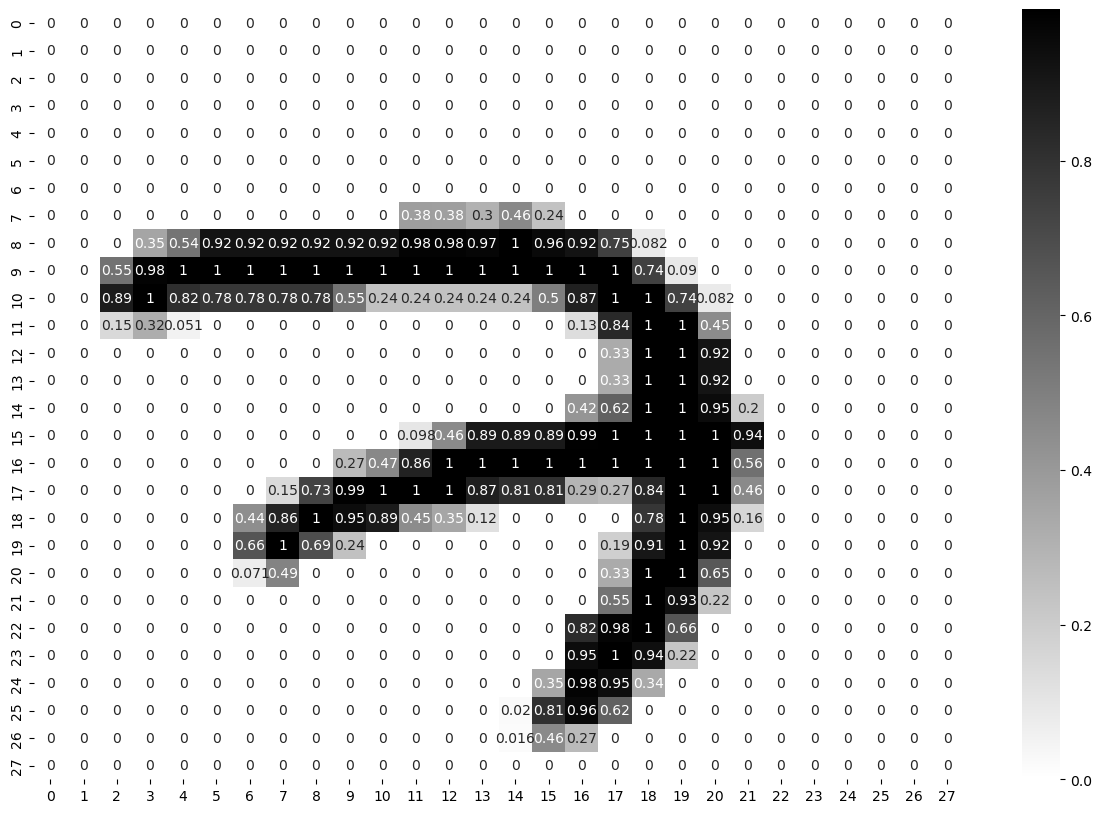

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0],annot=True,cmap='binary')

## create layers of ANN

In [15]:
Layers = [
         tf.keras.layers.Flatten(input_shape = [28,28],name = 'inputLayer'),
         tf.keras.layers.Dense(300,activation = "relu",name = 'hiddenLayer1'),
         tf.keras.layers.Dense(100,activation = 'relu',name = 'hiddenLayer2'),
         tf.keras.layers.Dense(10,activation = 'softmax',name = 'outputLayer')
         ]

In [16]:
model_clf = tf.keras.models.Sequential(Layers)

In [17]:
model_clf.layers

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model_clf.layers[1]

In [20]:
weights,bias = hidden1.get_weights()

In [21]:
weights

array([[ 0.03610769,  0.01711025,  0.04226322, ..., -0.05660059,
         0.03775488,  0.01250374],
       [-0.04261264, -0.02194089, -0.07346496, ...,  0.06383696,
         0.06218116,  0.01948611],
       [-0.02621337,  0.05887626,  0.03062192, ..., -0.01972651,
         0.03255593, -0.01468989],
       ...,
       [-0.05751467, -0.0285373 , -0.02253523, ..., -0.0684265 ,
         0.049521  , -0.06849348],
       [ 0.071144  , -0.00414565, -0.03616755, ..., -0.01996729,
         0.03454901,  0.06336284],
       [ 0.02327725,  0.05356814,  0.02565923, ...,  0.06202123,
         0.05727136,  0.06128098]], dtype=float32)

In [22]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
Lossfunction = "sparse_categorical_crossentropy"
optimiser = "SGD"
metrics = ["accuracy"]


In [24]:
model_clf.compile(loss= Lossfunction,optimizer=optimiser,metrics=metrics)

In [25]:
##training
EPOCHS = 30
validation_set = (X_val,y_val)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=validation_set,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6222 - accuracy: 0.8389 - val_loss: 0.3075 - val_accuracy: 0.9128
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.9161 - val_loss: 0.2406 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2382 - accuracy: 0.9312 - val_loss: 0.2033 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2037 - accuracy: 0.9415 - val_loss: 0.1792 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1776 - accuracy: 0.9490 - val_loss: 0.1631 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1567 - accuracy: 0.9554 - val_loss: 0.1443 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9604 - val_loss: 0.1318 - val_accuracy:

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.622217,0.838909,0.307458,0.9128
1,0.291549,0.916055,0.240608,0.9340
2,0.238249,0.931182,0.203292,0.9442
3,0.203692,0.941509,0.179164,0.9496
4,0.177606,0.949036,0.163103,0.9564
5,0.156678,0.955418,0.144344,0.9604
6,0.139962,0.960382,0.131769,0.9642
7,0.125713,0.964273,0.124442,0.9668
8,0.113848,0.967400,0.114298,0.9694
9,0.103465,0.971545,0.106042,0.9706


<AxesSubplot: >

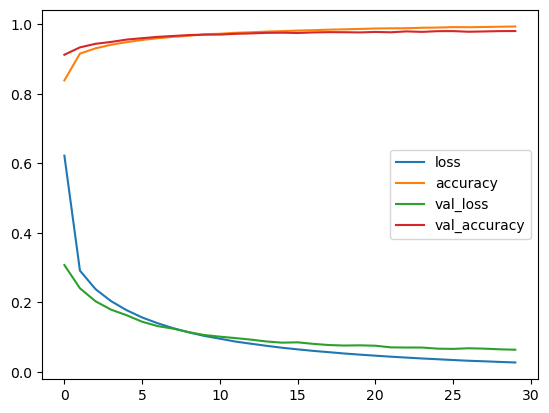

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9794


[0.06826499104499817, 0.9793999791145325]

In [34]:
X_new = X_test[:3]

In [35]:
actual = y_test[:3]

In [37]:
pred = model_clf.predict(X_new)

1/1 [==============================] - 0s 24ms/step


In [40]:
pred.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.002,
        0.   ]], dtype=float32)

In [43]:
predicted = np.argmax(pred,axis=1)

In [44]:
predicted,actual

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

Prediction is 7 Actual is 7


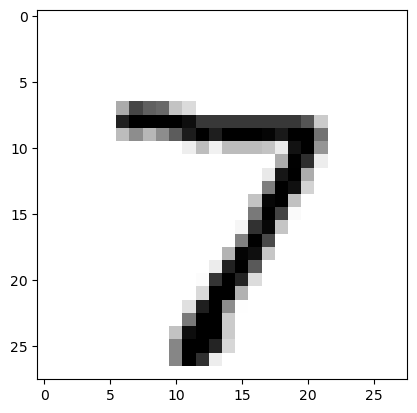

Prediction is 2 Actual is 2


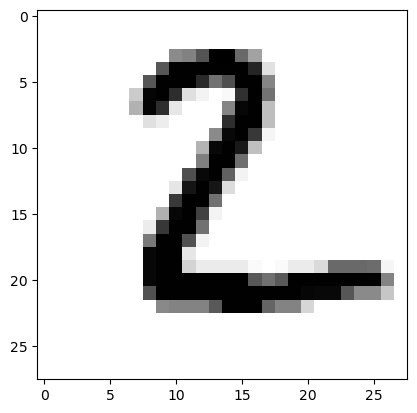

Prediction is 1 Actual is 1


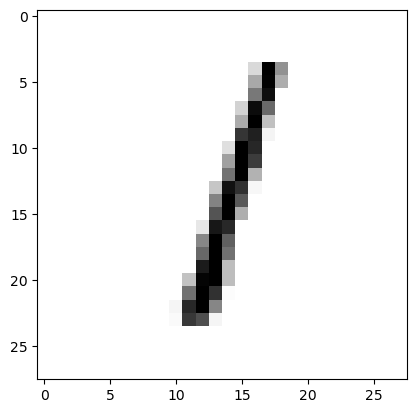

In [54]:
x = 0
for data in X_new:
    print("Prediction is",predicted[x],"Actual is",actual[x])
    x+=1
    plt.imshow(data,cmap='binary')
    plt.show()